In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import calendar as cal
import seaborn as sns
import datetime as dt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

##Analyze yogurt.h5 structure

In [3]:
data = h5.File(path)

def printname(name):   
    print(name)

data.visit(printname)

delivery_stores
delivery_stores/axis0
delivery_stores/axis1
delivery_stores/block0_items
delivery_stores/block0_values
delivery_stores/block1_items
delivery_stores/block1_values
delivery_stores/block2_items
delivery_stores/block2_values
demos
demos/axis0
demos/axis1
demos/block0_items
demos/block0_values
demos/block1_items
demos/block1_values
demos/block2_items
demos/block2_values
drug
drug/_i_table
drug/_i_table/index
drug/_i_table/index/abounds
drug/_i_table/index/bounds
drug/_i_table/index/indices
drug/_i_table/index/indicesLR
drug/_i_table/index/mbounds
drug/_i_table/index/mranges
drug/_i_table/index/ranges
drug/_i_table/index/sorted
drug/_i_table/index/sortedLR
drug/_i_table/index/zbounds
drug/table
groc
groc/_i_table
groc/_i_table/index
groc/_i_table/index/abounds
groc/_i_table/index/bounds
groc/_i_table/index/indices
groc/_i_table/index/indicesLR
groc/_i_table/index/mbounds
groc/_i_table/index/mranges
groc/_i_table/index/ranges
groc/_i_table/index/sorted
groc/_i_table/index/sort

In [4]:
data.close()

##Panel data

In [5]:
df = pd.read_hdf(path, key='panel')

In [6]:
df.head()

COLUPC  DOLLARS  IRI_KEY  MINUTE OUTLET    PANID  UNITS  WEEK  \
0  17047000300     0.99  1097117  5068.0    DK   3138826    1.0  1514   
1  17047000302     0.89  1097117  2224.0    DK   3138826    1.0  1489   
2  17047000650     0.89  1097117  6551.0    DK   3138826    1.0  1488   
3  17047000650     2.97  1097117  6177.0    DK   3182048    3.0  1526   
4  17047001372     1.49  1097117   973.0    DK   3184911    1.0  1495   

                            file  
0  yogurt_PANEL_DK_1479_1530.DAT  
1  yogurt_PANEL_DK_1479_1530.DAT  
2  yogurt_PANEL_DK_1479_1530.DAT  
3  yogurt_PANEL_DK_1479_1530.DAT  
4  yogurt_PANEL_DK_1479_1530.DAT

####Missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609107 entries, 0 to 15
Data columns (total 9 columns):
COLUPC     1609107 non-null int64
DOLLARS    1609107 non-null float64
IRI_KEY    1609107 non-null int64
MINUTE     520189 non-null float64
OUTLET     1609107 non-null object
PANID      1609107 non-null int64
UNITS      1609107 non-null float64
WEEK       1609107 non-null int64
file       1609107 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 122.8+ MB


We see that MINUTE is missing. We will drop this and work with data after 2008.

In [8]:
df = df.dropna(axis=0)
df.head()

COLUPC  DOLLARS  IRI_KEY  MINUTE OUTLET    PANID  UNITS  WEEK  \
0  17047000300     0.99  1097117  5068.0    DK   3138826    1.0  1514   
1  17047000302     0.89  1097117  2224.0    DK   3138826    1.0  1489   
2  17047000650     0.89  1097117  6551.0    DK   3138826    1.0  1488   
3  17047000650     2.97  1097117  6177.0    DK   3182048    3.0  1526   
4  17047001372     1.49  1097117   973.0    DK   3184911    1.0  1495   

                            file  
0  yogurt_PANEL_DK_1479_1530.DAT  
1  yogurt_PANEL_DK_1479_1530.DAT  
2  yogurt_PANEL_DK_1479_1530.DAT  
3  yogurt_PANEL_DK_1479_1530.DAT  
4  yogurt_PANEL_DK_1479_1530.DAT

####Sales by Outlet

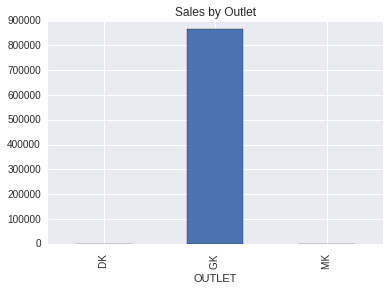

In [9]:
df.groupby('OUTLET')['DOLLARS'].sum().plot(kind='bar', title='Sales by Outlet');

GK has significantly higher sales compared to other outlets.

####Sales by time (MINUTE and WEEK)

In [10]:
def get_datetime(week, minute):
    week, minute = int(week), int(minute)
    # Reference orginal date is September 3, 1979
    ref_orginal = dt.date.toordinal(dt.date(1979, 9, 3))
    # Convert minutes to days, hours, minutes
    days, hours, mins = (minute / 1440), ((minute % 1440) / 60), ((minute % 1440) % 60)
    # Convert from ordinal.
    return dt.datetime.fromordinal(ref_orginal + (week - 1) * 7 + days).replace(
        hour=hours, minute=mins)

df = df.dropna(axis=0)
week = df['WEEK'].values
minute = df['MINUTE'].values
datetime = []

for w,m in zip(week,minute):
    datetime.append(get_datetime(w,m))

df['DATETIME']=datetime

In [11]:
df.head()

COLUPC  DOLLARS  IRI_KEY  MINUTE OUTLET    PANID  UNITS  WEEK  \
0  17047000300     0.99  1097117  5068.0    DK   3138826    1.0  1514   
1  17047000302     0.89  1097117  2224.0    DK   3138826    1.0  1489   
2  17047000650     0.89  1097117  6551.0    DK   3138826    1.0  1488   
3  17047000650     2.97  1097117  6177.0    DK   3182048    3.0  1526   
4  17047001372     1.49  1097117   973.0    DK   3184911    1.0  1495   

                            file            DATETIME  
0  yogurt_PANEL_DK_1479_1530.DAT 2008-09-04 12:28:00  
1  yogurt_PANEL_DK_1479_1530.DAT 2008-03-11 13:04:00  
2  yogurt_PANEL_DK_1479_1530.DAT 2008-03-07 13:11:00  
3  yogurt_PANEL_DK_1479_1530.DAT 2008-11-28 06:57:00  
4  yogurt_PANEL_DK_1479_1530.DAT 2008-04-21 16:13:00

Based on the spikes, we can tell that yogurt sales are higher during certain times of the day.

Now analyzing based on Years:

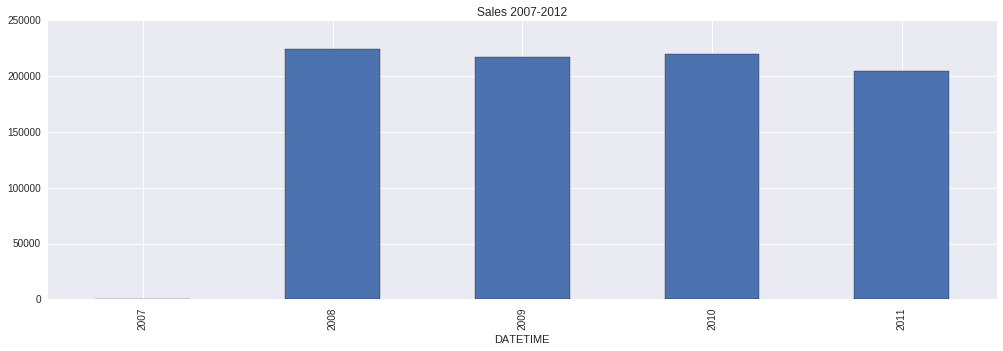

In [12]:
plt.figure(figsize=(17,5));
df.groupby(df.DATETIME.dt.year)['DOLLARS'].sum().plot(kind='bar',title='Sales 2007-2012');

While there are spikes in sales of yogurt after 2008, there are no observable pattern. This might be caused by the dropping of NaNs. Hence we will drop values before 2008.

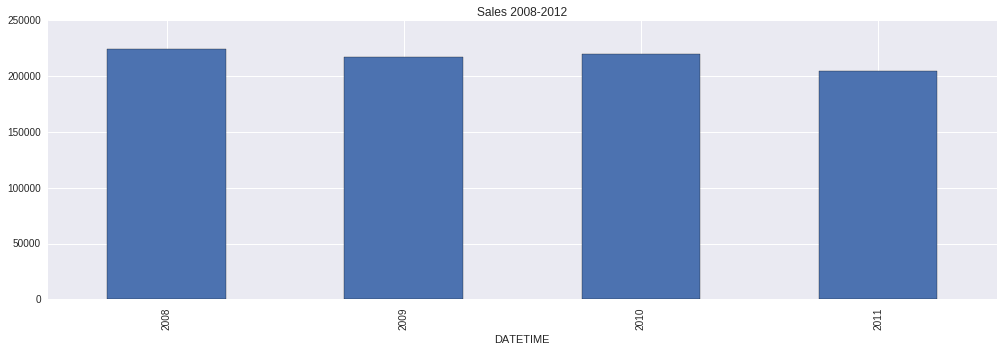

In [13]:
df = df[df.DATETIME.dt.year>2007]

plt.figure(figsize=(17,5));
df.groupby(df.DATETIME.dt.year)['DOLLARS'].sum().plot(kind='bar',title='Sales 2008-2012');

Now let's look at our data by Month, Day and Hour:

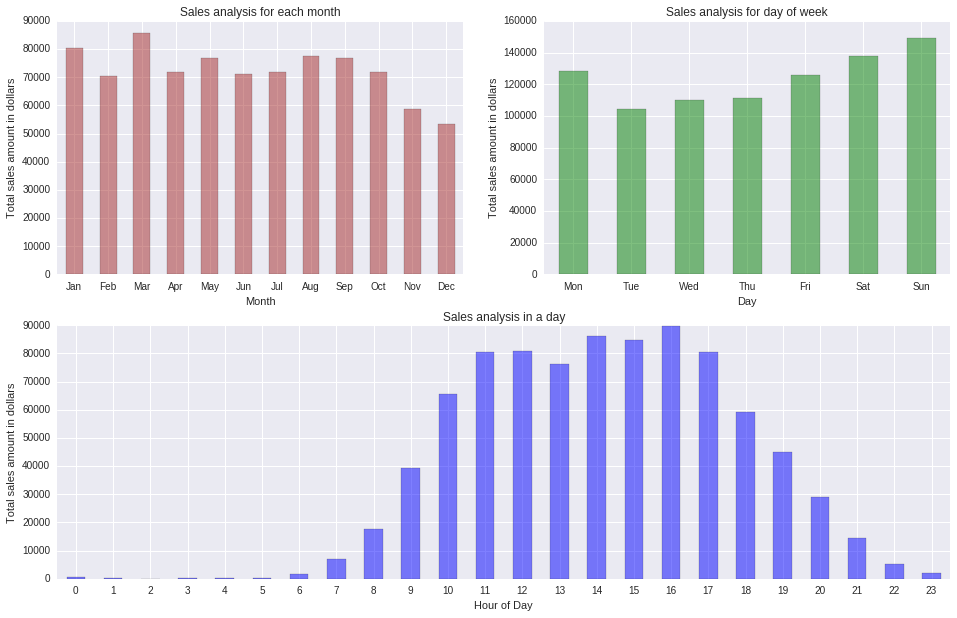

In [14]:
product_panel = df
product_panel['MINUTE'].dropna(inplace=True)

# Setup figure
gs = plt.GridSpec(2, 2, wspace=0.2)
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Sales analysis in each month

product_sales_hour = product_panel.groupby(
    product_panel.DATETIME.dt.month)['DOLLARS'].sum()
product_sales_hour.plot(kind='bar', title="Sales analysis for each month", ax=ax1,
    rot=0, alpha=0.5, color='brown').set(
    ylabel="Total sales amount in dollars", xlabel="Month")

# Set the format for xlabels
ax1.xaxis.set_major_formatter(FuncFormatter(lambda month_num, pos : cal.month_abbr[month_num + 1]))

# Sales anaysis per day of week.
product_sales_week = product_panel.groupby(
    product_panel.DATETIME.dt.dayofweek)['DOLLARS'].sum()
product_sales_week.plot(kind='bar', title="Sales analysis for day of week", ax=ax2,
    alpha=0.5, color='g', rot=0).set(ylabel="Total sales amount in dollars", xlabel="Day")

# Set the format for xlabels
ax2.xaxis.set_major_formatter(FuncFormatter(lambda day_num, pos : cal.day_abbr[day_num]))

# Sales analysis in each hour of a day.
product_sales_hour = product_panel.groupby(
    product_panel.DATETIME.dt.hour)['DOLLARS'].sum()
product_sales_hour.plot(kind='bar', title="Sales analysis in a day", ax=ax3,
    rot=0, alpha=0.5, color='blue').set(xlabel="Hour of Day",
    ylabel="Total sales amount in dollars");


Yogurt sales seem to be higehr closer towards the weekends and is higher during the afternoons.

####Conclusion

- We have a lot of NaNs in MINUTE, specifically from GR (67%) outlets. (not on code)
- Yogurt sales before 2008 were dropped to maintain accuracy.
- Yogurt sales seem to be higehr closer towards the weekends and is higher during the afternoons.
- GK has the highest sales in yogurt

#Drug Data

In [15]:
df = pd.read_hdf(path, key='drug')

In [16]:
df.head() 

IRI_KEY  WEEK  SY  GE   VEND  ITEM  UNITS  DOLLARS     F  D  PR  \
0  8042577  1133   0   1  70470   300      2     1.78  NONE  0   0   
1  8042577  1134   0   1  70470   300      1     0.89  NONE  0   0   
2  8042577  1135   0   1  70470   300      1     0.89  NONE  0   0   
3  8042577  1136   0   1  70470   313      1     0.89  NONE  0   0   
4  8042577  1137   0   1  70470   300      2     1.78  NONE  0   0   

                    file  year_int  
0  yogurt_drug_1114_1165         1  
1  yogurt_drug_1114_1165         1  
2  yogurt_drug_1114_1165         1  
3  yogurt_drug_1114_1165         1  
4  yogurt_drug_1114_1165         1

####Missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357688 entries, 0 to 29438
Data columns (total 13 columns):
IRI_KEY     357688 non-null int64
WEEK        357688 non-null int64
SY          357688 non-null int64
GE          357688 non-null int64
VEND        357688 non-null int64
ITEM        357688 non-null int64
UNITS       357688 non-null int64
DOLLARS     357688 non-null float64
F           357688 non-null object
D           357688 non-null int64
PR          357688 non-null int64
file        357688 non-null object
year_int    357688 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 38.2+ MB


There are no NaN in the dataset

####Features

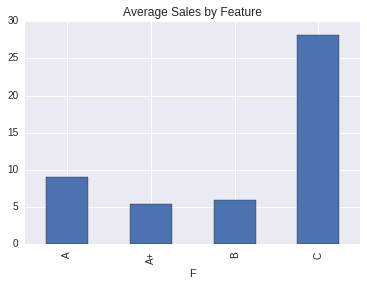

In [18]:
df[df['F']!='NONE'].groupby('F')['DOLLARS'].mean().plot(kind='bar', title='Average Sales by Feature');

Possible Values for Feature (F):

- C – small ad, usually 1 line of text
- B – medium size ad
- A – large size ad
- A+ ad – also known as “Q” or “R” – retailer coupon or rebate


####Display

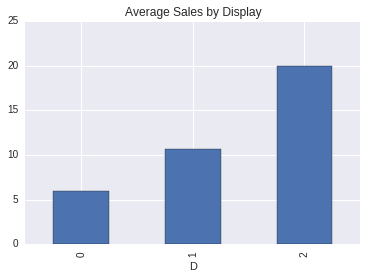

In [19]:
df[df['F']!='NONE'].groupby('D')['DOLLARS'].mean().plot(kind='bar', title='Average Sales by Display');

Possible values of Display(D): 

- 0 – NO
- 1 – MINOR
- 2 – MAJOR (MAJOR includes codes 1 & 2)

Based on this, larger displays contribute to greater average sales.

####Price Reduction

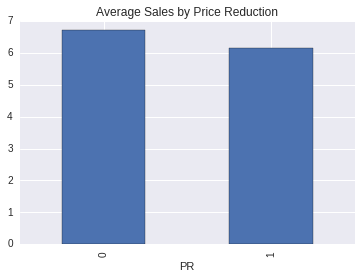

In [20]:
df[df['F']!='NONE'].groupby('PR')['DOLLARS'].mean().plot(kind='bar', title='Average Sales by Price Reduction');

Price Reduction flag: 

- 1 if TPR is 5% or greater
- 0 otherwise

Price Reduction has very little effect on sales.

####Others

System, Generator, Vendor and Item UPC were ignored as we do not have any documentation on them.

####Conclusion

- Small ads (1 line of text) with larger displays contributes to greater yogurt sales.

##Delivery Stores

In [185]:
store = pd.read_hdf(path, key='delivery_stores')

In [186]:
store.head()

IRI_KEY  OU    EST_ACV        Market_Name  Open  Clsd  yearid  year name
0   200039  GR   9.602997  BUFFALO/ROCHESTER   539  1219       1  2001  107
1   200171  GR  28.454990          MILWAUKEE   522  9998       1  2001  118
2   200197  GR  11.314990  PEORIA/SPRINGFLD.   903  9998       1  2001   75
3   200233  GR   7.473000      OKLAHOMA CITY  1122  1150       1  2001  123
4   200272  GR  13.266000        LOS ANGELES   873  9998       1  2001  150

In [198]:
panel = pd.read_hdf(path, key='panel')

In [199]:
panel.head()

COLUPC  DOLLARS  IRI_KEY  MINUTE OUTLET    PANID  UNITS  WEEK  \
0  17047000300     0.99  1097117  5068.0    DK   3138826    1.0  1514   
1  17047000302     0.89  1097117  2224.0    DK   3138826    1.0  1489   
2  17047000650     0.89  1097117  6551.0    DK   3138826    1.0  1488   
3  17047000650     2.97  1097117  6177.0    DK   3182048    3.0  1526   
4  17047001372     1.49  1097117   973.0    DK   3184911    1.0  1495   

                            file  
0  yogurt_PANEL_DK_1479_1530.DAT  
1  yogurt_PANEL_DK_1479_1530.DAT  
2  yogurt_PANEL_DK_1479_1530.DAT  
3  yogurt_PANEL_DK_1479_1530.DAT  
4  yogurt_PANEL_DK_1479_1530.DAT

In [200]:
def get_datetime(week, minute):
    if np.isnan(minute):
        minute=0
    week, minute = int(week), int(minute)
    # Reference orginal date is September 3, 1979
    ref_orginal = dt.date.toordinal(dt.date(1979, 9, 3))
    # Convert minutes to days, hours, minutes
    days, hours, mins = (minute / 1440), ((minute % 1440) / 60), ((minute % 1440) % 60)
    # Convert from ordinal.
    return dt.datetime.fromordinal(ref_orginal + (week - 1) * 7 + days).replace(
        hour=hours, minute=mins)

week = panel['WEEK'].values
minute = panel['MINUTE'].values
datetime = []

for w,m in zip(week,minute):
    datetime.append(get_datetime(w,m))

panel = panel.drop(['MINUTE','WEEK'], axis=1)
panel['DATETIME']=datetime
panel['MONTH'] = panel.DATETIME.dt.month
panel['HOUR'] = panel.DATETIME.dt.hour
panel['year'] = panel.DATETIME.dt.year
panel = panel.drop(['DATETIME'], axis=1)

panel.head()

COLUPC  DOLLARS  IRI_KEY OUTLET    PANID  UNITS  \
0  17047000300     0.99  1097117    DK   3138826    1.0   
1  17047000302     0.89  1097117    DK   3138826    1.0   
2  17047000650     0.89  1097117    DK   3138826    1.0   
3  17047000650     2.97  1097117    DK   3182048    3.0   
4  17047001372     1.49  1097117    DK   3184911    1.0   

                            file  MONTH  HOUR  year  
0  yogurt_PANEL_DK_1479_1530.DAT      9    12  2008  
1  yogurt_PANEL_DK_1479_1530.DAT      3    13  2008  
2  yogurt_PANEL_DK_1479_1530.DAT      3    13  2008  
3  yogurt_PANEL_DK_1479_1530.DAT     11     6  2008  
4  yogurt_PANEL_DK_1479_1530.DAT      4    16  2008

In [202]:
store = store[['OU','EST_ACV','Market_Name','year','IRI_KEY']]
panel = panel[['DOLLARS','IRI_KEY','year']]
store_panel = store.merge(panel, how='inner')
store_panel.head()

OU   EST_ACV Market_Name  year  IRI_KEY  DOLLARS
0  GR  19.26599  EAU CLAIRE  2001   200564     1.58
1  GR  19.26599  EAU CLAIRE  2001   200564     0.79
2  GR  19.26599  EAU CLAIRE  2001   200564     0.79
3  GR  19.26599  EAU CLAIRE  2001   200564     0.78
4  GR  19.26599  EAU CLAIRE  2001   200564     0.59

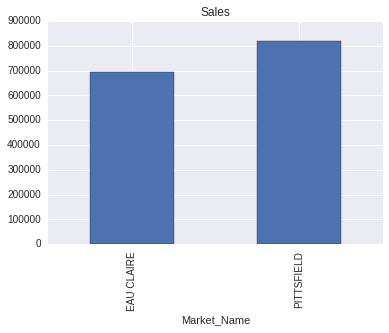

In [203]:
store_panel.groupby('Market_Name')['DOLLARS'].sum().plot(kind='bar', title='Sales');

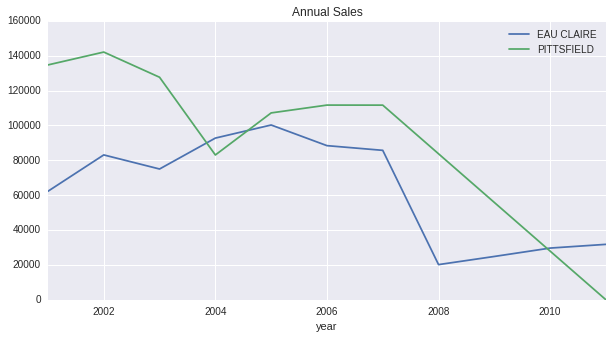

In [211]:
plt.figure(figsize=(10,5))
for i in store_panel['Market_Name'].unique():
    cond = store_panel['Market_Name']==i
    store_panel[cond].groupby('year')['DOLLARS'].sum().plot(kind='line', title='Annual Sales')
plt.legend(store_panel['Market_Name'].unique(), loc=0);

Both stores ahve similar yogurt sales and both show decline after 2007.

In [205]:
drug = pd.read_hdf(path, key='drug')
drug.head()

IRI_KEY  WEEK  SY  GE   VEND  ITEM  UNITS  DOLLARS     F  D  PR  \
0  8042577  1133   0   1  70470   300      2     1.78  NONE  0   0   
1  8042577  1134   0   1  70470   300      1     0.89  NONE  0   0   
2  8042577  1135   0   1  70470   300      1     0.89  NONE  0   0   
3  8042577  1136   0   1  70470   313      1     0.89  NONE  0   0   
4  8042577  1137   0   1  70470   300      2     1.78  NONE  0   0   

                    file  year_int  
0  yogurt_drug_1114_1165         1  
1  yogurt_drug_1114_1165         1  
2  yogurt_drug_1114_1165         1  
3  yogurt_drug_1114_1165         1  
4  yogurt_drug_1114_1165         1

In [206]:
drug = drug[['IRI_KEY','F','D','PR']]
store_drug_panel = store_panel.merge(drug, how='inner')
store_drug_panel.head()

OU   EST_ACV Market_Name  year  IRI_KEY  DOLLARS     F  D  PR
0  DR  5.167999  EAU CLAIRE  2001   651444     0.89  NONE  0   0
1  DR  5.167999  EAU CLAIRE  2001   651444     0.89  NONE  0   0
2  DR  5.167999  EAU CLAIRE  2001   651444     0.89  NONE  0   0
3  DR  5.167999  EAU CLAIRE  2001   651444     0.89  NONE  0   0
4  DR  5.167999  EAU CLAIRE  2001   651444     0.89  NONE  0   0

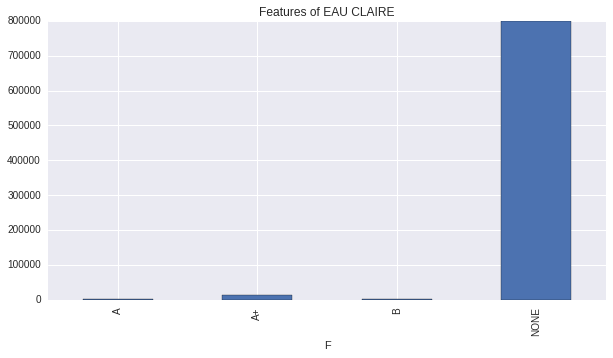

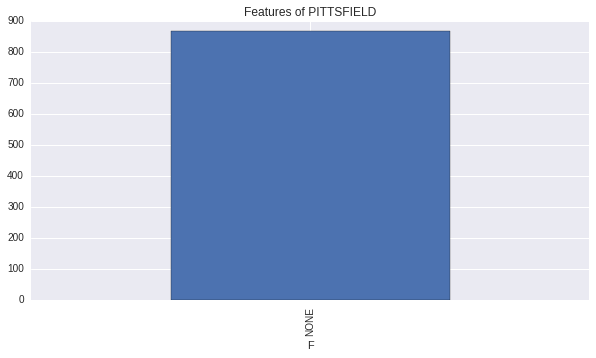

In [207]:
for i in store_drug_panel['Market_Name'].unique():
    plt.figure(figsize=(10,5))
    cond = store_drug_panel['Market_Name']==i
    store_drug_panel[cond].groupby(['F'])['DOLLARS'].sum().plot(kind='bar', title='Features of '+i)

Both stores use 1 line ads

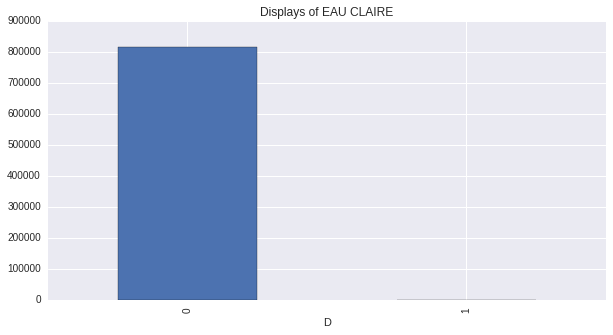

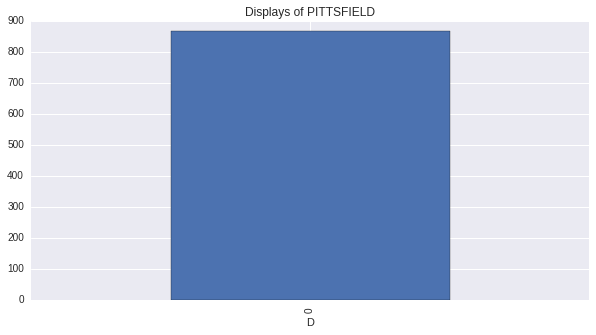

In [208]:
for i in store_drug_panel['Market_Name'].unique():
    plt.figure(figsize=(10,5))
    cond = store_drug_panel['Market_Name']==i
    store_drug_panel[cond].groupby(['D'])['DOLLARS'].sum().plot(kind='bar', title='Displays of '+i)

Both stores use simialr small displays

In [209]:
for i in store_drug_panel['Market_Name'].unique():
    plt.figure(figsize=(10,5))
    cond = store_drug_panel['Market_Name']==i
    store_drug_panel[cond].groupby(['PR'])['DOLLARS'].sum().plot(kind='bar', title='Public Relations of '+i)

Both stores have similar promotions of 5% discount